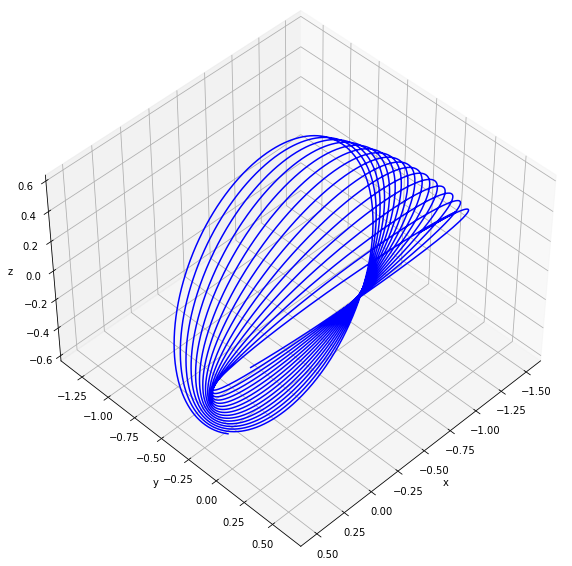

In [15]:
#Kanishka Deepak
#AE 502 - Homework Project 3

#2

import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt

def r_eval(a, e, inc, M, w, omega, steps):
    rx_ = np.zeros(steps)
    ry_ = np.zeros(steps)
    rz_ = np.zeros(steps)
    mu = 1
    for i in range(steps):
        if M[i] < np.pi:
            E = M[i] + e / 2
        else:
            E = M[i] - e / 2
        
        f = 2 * np.arctan(np.sqrt((1 + e) / (1 - e)) * np.tan(E/2))

        theta = w[i] + f

        r = a * (1 - e**2) / (1 + e * np.cos(f))

        ri = np.cos(theta) * np.cos(omega[i]) - np.cos(inc*np.pi/180) * np.sin(omega[i]) * np.sin(theta)
        rj = np.cos(theta) * np.sin(omega[i]) + np.cos(inc*np.pi/180) * np.cos(omega[i]) * np.sin(theta)
        rk = np.sin(inc*np.pi/180) * np.sin(theta)

        rx_[i] = r * ri #DU
        ry_[i] = r * rj #DU
        rz_[i] = r * rk #DU

    return rx_, ry_, rz_



def diff_ode(t, state, omega):
    L = state[3]
    dl = 1 / (L**3)
    dg = 0
    dh = omega
    dL = 0
    dG = 0
    dH = 0
    EOC = [dl, dg, dh, dL, dG, dH]

    return EOC

mu = 1
rotation = 0.01
a = 1 #DU
e = 0.5
inc = 45 #deg
duration = 100 #TU

#choose number of steps
steps = 10000

#calculate useful parameters
n = np.sqrt(mu / a**3)

#calculate initial Delaunay variables
L = n * a **2
G = L * (1 - e ** 2)**(1/2)
H = G * np.cos(inc*np.pi/180)

#propagate orbit
state0 = [0., 0., 0., L, G, H]
tspan = np.linspace(0, duration, steps)
sol = ode(diff_ode).set_integrator('lsoda').set_initial_value(state0, 0).set_f_params(rotation)
traj = np.zeros((steps, 6))
traj[0] = state0

for i in range(1, steps):
    traj[i] = sol.integrate(tspan[i])
    if not sol.successful():
        break

#pull variables out of propagation
l = traj[:,0]
g = traj[:,1]
h = traj[:,2]

#convert to Kepler elements
M = l
w = g
omega = h - g

#convert to Cartesian space
rx, ry, rz = r_eval(a, e, inc, M, w, omega, steps)

#plot orbit
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot(rx, ry, rz, color='b')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(elev=45, azim=45)
plt.show()